# 02 — EDA **Exploratory Data Analysis**: pagrindiniai žingsniai

### Pagrindiniai EDA tikslai

- **Suprasti kintamųjų tipus**  
  (skaitiniai, kategoriniai, ordinalūs ir pan.)

- **Patikrinti duomenų kokybę**  
  (trūkstamos reikšmės, pasikartojimai, klaidingos reikšmės)

- **Aprašyti pagrindinius rodiklius**  
  (vidurkis, mediana, moda, dispersija, kvartiliai)

- **Pavaizduoti duomenis grafiškai**  
  (histogramos, dėžučių diagramos, sklaidos grafikai, bar chart)

- **Pastebėti outlierius**  
  (išskirtines reikšmes)

- **Įvertinti ryšius tarp kintamųjų**  
  (koreliacijos, grupių skirtumai)


## 0 žinksnis: **Bibliotekų importavimas**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 žinksnis: **Duomenų įkėlimas**

In [40]:
# Įkelkime duomenis
df = pd.read_csv("mini_shop_sales.csv")

## 2 žinksnis: **Duomenų apžvalga**

## Pagrindiniai EDA žingsniai

2.1. **Pirminė peržiūra**   

2.2. **Duomenų kokybės tikrinimas**  

2.3. **Kintamųjų tipų identifikavimas**  

2.4. **Aprašomoji statistika**  

2.5. **Vizualizacijos vienam kintamajam**  

2.6. **Ryšių tarp kintamųjų analizė**  

2.7. **Išvados ir duomenų paruošimo planas**  

### 2.1. **Pirminė peržiūra**  
   - `df.head()`, `df.info()`  

In [41]:
# 1) Peržiūra
df.head()

,order_id,customer_segment,city,membership_level,satisfaction,items_count,revenue,delivery_time_days,temperature_c,returned
0,1,B,Vilnius,Gold,High,4,11.711634,2.064192,23.850472,0
1,2,A,Kaunas,Bronze,Medium,2,15.937593,0.442284,13.346728,0
2,3,C,Vilnius,Gold,Low,2,8.898782,5.059285,28.390551,1
3,4,B,Vilnius,Silver,High,2,18.671088,2.212487,12.715129,0
4,5,A,Kaunas,Bronze,Low,3,38.979435,2.208552,28.285627,0


In [42]:
df.shape

(1002, 10)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            1002 non-null   int64  
 1   customer_segment    1002 non-null   object 
 2   city                972 non-null    object 
 3   membership_level    982 non-null    object 
 4   satisfaction        1002 non-null   object 
 5   items_count         1002 non-null   int64  
 6   revenue             992 non-null    float64
 7   delivery_time_days  992 non-null    float64
 8   temperature_c       1002 non-null   float64
 9   returned            1002 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.4+ KB


### 2.2. **Duomenų kokybės tikrinimas**  
   - trūkstamų reikšmių skaičiavimas: `df.isna().sum()`  
   - dublikatų tikrinimas: `df.duplicated().sum()`  
   - neteisingų reikšmių paieška (pvz., neigiami amžiai)

In [44]:
# 2) Trūkstamos reikšmės
df.isnull().sum()

order_id               0
customer_segment       0
city                  30
membership_level      20
satisfaction           0
items_count            0
revenue               10
delivery_time_days    10
temperature_c          0
returned               0
dtype: int64

In [45]:
df.isnull().mean().round(3)

order_id              0.00
customer_segment      0.00
city                  0.03
membership_level      0.02
satisfaction          0.00
items_count           0.00
revenue               0.01
delivery_time_days    0.01
temperature_c         0.00
returned              0.00
dtype: float64

In [46]:
# dublikatų tikrinimas:
df.duplicated().sum()

np.int64(1)

In [47]:
df[df.duplicated(keep=False)].sort_values(list(df.columns))

,order_id,customer_segment,city,membership_level,satisfaction,items_count,revenue,delivery_time_days,temperature_c,returned
999,1000,A,Kaunas,Bronze,Low,2,4.46515,3.236884,25.534583,0
1001,1000,A,Kaunas,Bronze,Low,2,4.46515,3.236884,25.534583,0


In [48]:
neig_items = df[(df['items_count'] < 0)]
print('neig_items:', neig_items)

neig_items: Empty DataFrame
Columns: [order_id, customer_segment, city, membership_level, satisfaction, items_count, revenue, delivery_time_days, temperature_c, returned]
Index: []


In [49]:
neig_items_rev = df[(df['revenue'] < 0)]
print('neig_items rev:', neig_items_rev)

neig_items rev: Empty DataFrame
Columns: [order_id, customer_segment, city, membership_level, satisfaction, items_count, revenue, delivery_time_days, temperature_c, returned]
Index: []


### 2.3. **Kintamųjų tipų identifikavimas**  
   - skaitiniai (diskretūs, tolydieji)  
   - kategoriniai (nominalūs, ordinalūs)  
   - datų / tekstiniai

In [50]:
df.head()

,order_id,customer_segment,city,membership_level,satisfaction,items_count,revenue,delivery_time_days,temperature_c,returned
0,1,B,Vilnius,Gold,High,4,11.711634,2.064192,23.850472,0
1,2,A,Kaunas,Bronze,Medium,2,15.937593,0.442284,13.346728,0
2,3,C,Vilnius,Gold,Low,2,8.898782,5.059285,28.390551,1
3,4,B,Vilnius,Silver,High,2,18.671088,2.212487,12.715129,0
4,5,A,Kaunas,Bronze,Low,3,38.979435,2.208552,28.285627,0


                        SKAITNIAI
temperature_c, revenue yra tolydusis
order_id, items_count diskretusis
                        KATEGORINIAI
city, customer_segment nominalus
membership_level, satisfaction ordinalus
                        LOGINES REIKSMES
True, False
                        DATU, TEKSTINIAI





### 2.4. **Aprašomoji statistika**  
   - vidurkis, mediana, moda  
   - dispersija, standartinis nuokrypis, kvartiliai  
   - `df.describe(include="all")`

In [51]:
# Santrauka
df.describe(include='all')

,order_id,customer_segment,city,membership_level,satisfaction,items_count,revenue,delivery_time_days,temperature_c,returned
count,1002.000000,1002,972,982,1002,1002.000000,992.000000,992.000000,1002.000000,1002.000000
unique,NaN,3,5,4,5,NaN,NaN,NaN,NaN,NaN
top,NaN,A,Vilnius,Bronze,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,452,434,495,362,NaN,NaN,NaN,NaN,NaN
mean,501.498004,NaN,NaN,NaN,NaN,3.207585,17.380131,2.512028,16.728949,0.116766
std,289.393338,NaN,NaN,NaN,NaN,1.728535,26.406869,2.335956,7.982171,0.321302
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.654838,0.031261,-7.662441,0.000000
25%,251.250000,NaN,NaN,NaN,NaN,2.000000,6.900762,1.183396,11.177214,0.000000
50%,501.500000,NaN,NaN,NaN,NaN,3.000000,11.503503,2.063122,16.626085,0.000000
75%,751.750000,NaN,NaN,NaN,NaN,4.000000,19.485335,3.236884,21.632316,0.000000



### 2.5. **Vizualizacijos vienam kintamajam**  
   - histogramos, dėžučių diagramos, bar chart  
   - tikrinti pasiskirstymą ir galimus outlierius

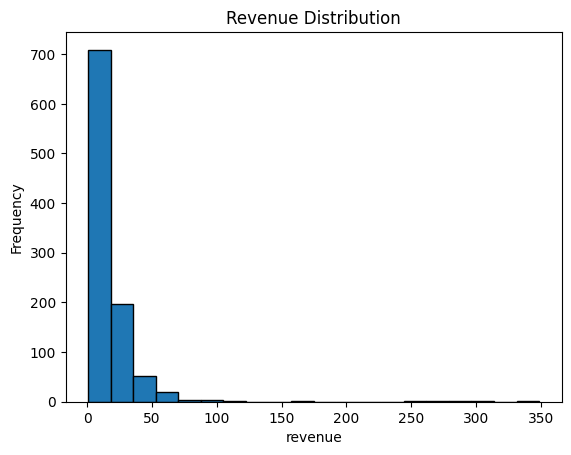

In [52]:
# 5) Pasiskirstymai
# histograma
plt.hist(df['revenue'], bins=20, edgecolor='black')
plt.title('Revenue Distribution')
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.show()

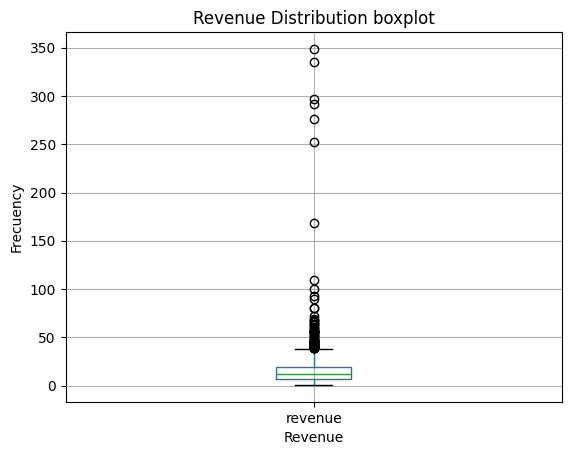

In [53]:
# boxplot
plt.figure()
# plt.boxplot(df['revenue'])
df.boxplot(column='revenue')
plt.title('Revenue Distribution boxplot')
plt.xlabel('Revenue')
plt.ylabel('Frecuency')
plt.show()

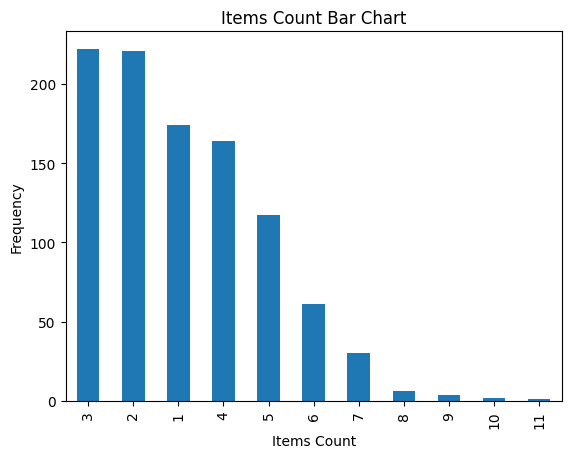

In [54]:
# barchart
df['items_count'].value_counts().plot(kind='bar')
plt.title('Items Count Bar Chart')
plt.xlabel('Items Count')
plt.ylabel('Frequency')
plt.show()


### 2.6. **Ryšių tarp kintamųjų analizė**  
   - sklaidos grafikai, `df.corr()`  
   - grupių palyginimai (pvz., `groupby`)  
   - kryžminės lentelės kategoriniams
   

In [55]:
# 6) Ryšiai
df.corr(numeric_only=True).round(2)


,order_id,items_count,revenue,delivery_time_days,temperature_c,returned
order_id,1.00,0.04,0.03,0.02,-0.00,0.03
items_count,0.04,1.00,-0.02,0.02,-0.06,0.01
revenue,0.03,-0.02,1.00,0.05,-0.06,0.02
delivery_time_days,0.02,0.02,0.05,1.00,-0.00,0.05
temperature_c,-0.00,-0.06,-0.06,-0.00,1.00,-0.05
returned,0.03,0.01,0.02,0.05,-0.05,1.00


In [56]:
import seaborn as sns

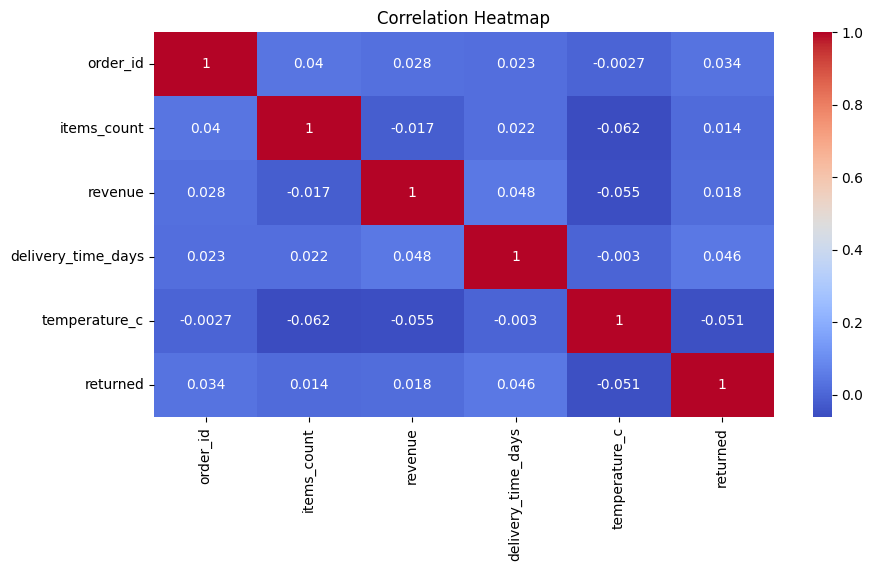

In [59]:
# Apskaičiuojame koreliaciją tarp visų skaitinių kintamųjų
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 2.7. **Išvados ir duomenų paruošimo planas**  
   - ką tvarkyti (trūkstami, outlieriai, kodavimas)  
   - ką transformuoti (log, normalizacija)  
   - kokias hipotezes verta tikrinti toliau

**Užduotis:** parašykite 2–3 įžvalgas  apie duomenis: trūkumus, skirstinius, ryšius, galimus outlierius.


## 3 Žinksnis: **Duomenų tvarkymas**